# Importe

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from uncertainties import ufloat

import pandas as pd
from scipy.optimize import curve_fit
import statsmodels.api as sm
import scipy as sp
import scipy.stats as stats


plt.rc('text',usetex=True)

# Functions

In [ ]:
def chi_sq(y, fx, u_y, p=2):    # für 2 Fitparameter
    """
    Variables
      n [int]:                length of the
      y [numpy array]:        y values for the y axis
      fx [numpy array]:       y values from the regression
      u_y[int, numpy array]:  Unsicherheit/uncertainty from y
      p [int]:                number of parameters of the regression
    Return:
      chi square
    """
    n = len(y)
    factor = 1 / (n - p)
    return factor * np.sum((y - fx)**2 / u_y**2)


# Daten laden

In [ ]:
data1=pd.read_csv('A1.txt',sep='\t')
data2=pd.read_csv('A2.txt',sep='\t')
data1['n_err']=[0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05]
data1

,n,Masse,Tp,Periode,n_err
0,10.81,0.05,12.98,1,0.05
1,10.70,0.10,6.49,1,0.05
2,10.70,0.15,4.49,1,0.05
3,10.70,0.20,3.49,1,0.05
4,10.75,0.25,8.28,3,0.05
5,10.80,0.30,7.75,3,0.05
6,10.80,0.35,6.74,3,0.05
7,10.80,0.40,7.55,3,0.05
8,10.80,0.45,6.91,4,0.05
9,10.80,0.50,5.71,4,0.05


In [ ]:
data2['n_err']=[0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05]
data2

,n,Masse,Tp,Periode,n_err
0,2.70,0.2,14.34,10,0.05
1,4.30,0.2,7.91,5,0.05
2,5.00,0.2,7.80,5,0.05
3,6.00,0.2,9.56,5,0.05
4,7.70,0.2,12.47,5,0.05
5,8.45,0.2,13.41,5,0.05
6,9.95,0.2,15.33,5,0.05
7,11.15,0.2,17.09,5,0.05
8,12.90,0.2,11.97,3,0.05
9,14.50,0.2,8.99,2,0.05


In [ ]:
Tp_2=data2['Tp']/data2['Periode']
Tp_2=Tp_2.values
Tp_2

array([1.434, 1.582, 1.56 , 1.912, 2.494, 2.682, 3.066, 3.418, 3.99 ,
       4.495])

In [ ]:
data3=pd.read_csv('A3.txt',sep='\t')
data3

,n,T1,T2,Per1,T3,T4,Per2
0,5.25,3.42,3.98,1,5.31,6.00,1
1,6.35,1.63,2.55,2,4.31,4.97,1
2,7.35,8.71,10.06,2,13.31,13.85,1
3,8.80,6.87,7.47,1,15.71,16.31,2
4,8.80,5.95,6.71,2,9.55,10.97,2
5,10.00,4.55,5.45,2,11.20,12.43,3
6,11.46,4.97,5.97,2,8.15,9.00,2
7,13.00,20.80,21.65,2,23.97,24.84,2
8,15.00,7.31,8.77,3,11.87,13.12,3
9,16.05,28.35,29.15,3,30.15,31.15,3


In [ ]:
data3_1=pd.read_csv('A3_1.txt',sep='\t')
u_t_3_1=0.01+5e-4*data3_1['t1']
u_t_3_2=0.01+5e-4*data3_1['t2']
data3_1

,n,t1,t2,dt
0,5.25,3.42,3.98,0.56
1,6.35,4.31,4.97,0.66
2,7.35,13.31,13.85,0.54
3,8.80,6.87,7.47,0.60
4,8.80,5.96,6.35,0.39
5,10.00,4.56,5.15,0.59
6,11.46,5.11,5.53,0.42
7,13.00,21.02,21.31,0.29
8,15.00,12.15,12.50,0.35
9,16.05,30.37,30.71,0.34


In [ ]:
data3_1['u1']=u_t_3_1
data3_1['u2']=u_t_3_2
data3_1

,n,t1,t2,dt,u1,u2
0,5.25,3.42,3.98,0.56,0.011710,0.011990
1,6.35,4.31,4.97,0.66,0.012155,0.012485
2,7.35,13.31,13.85,0.54,0.016655,0.016925
3,8.80,6.87,7.47,0.60,0.013435,0.013735
4,8.80,5.96,6.35,0.39,0.012980,0.013175
5,10.00,4.56,5.15,0.59,0.012280,0.012575
6,11.46,5.11,5.53,0.42,0.012555,0.012765
7,13.00,21.02,21.31,0.29,0.020510,0.020655
8,15.00,12.15,12.50,0.35,0.016075,0.016250
9,16.05,30.37,30.71,0.34,0.025185,0.025355


In [ ]:
t1_err=np.array([ufloat(3.42,0.012),
                ufloat(4.31,0.012),
                ufloat(13.31,0.017),
                ufloat(6.87,0.013),
                ufloat(5.96,0.013),
                ufloat(4.56,0.012),
                ufloat(5.11,0.013),
                ufloat(21.02,0.021),
                ufloat(12.15,0.016),
                ufloat(30.37,0.025)])

t2_err=np.array([ufloat(3.98,0.012),
                ufloat(4.97,0.012),
                ufloat(13.85,0.017),
                ufloat(7.47,0.014),
                ufloat(6.35,0.013),
                ufloat(5.15,0.013),
                ufloat(5.53,0.013),
                ufloat(21.31,0.021),
                ufloat(12.50,0.016),
                ufloat(30.71,0.025)])

## Daten aus dritten Datensatz bearbeiten

In [ ]:
n_3_1=data3_1['n']
Tn_1=data3_1['dt']
Tn_1_err=t2_err-t1_err
print(Tn_1_err)

[0.56+/-0.01697056274847714 0.6600000000000001+/-0.01697056274847714
 0.5399999999999991+/-0.024041630560342617
 0.5999999999999996+/-0.0191049731745428
 0.3899999999999997+/-0.018384776310850236
 0.5900000000000007+/-0.01769180601295413
 0.41999999999999993+/-0.018384776310850236
 0.28999999999999915+/-0.029698484809835
 0.34999999999999964+/-0.02262741699796952
 0.33999999999999986+/-0.03535533905932738]


In [ ]:
dt_err=[0.017,0.017,0.024,0.019,0.018,0.018,0.018,0.030,0.023,0.04]
#print(len(dt_err))

In [ ]:
# Datensätze erzeugen
n_3=data3['n'].values
T_n_1=data3['T1'].values
T_n_2=data3['T2'].values
T_n_3=data3['T3'].values
T_n_4=data3['T4'].values
p1=data3['Per1'].values
p2=data3['Per2'].values


In [ ]:
np_3_err=np.array([ufloat(5.25,0.05),
                  ufloat(6.35,0.05),
                  ufloat(7.35,0.05),
                  ufloat(8.8,0.05),
                  ufloat(8.8,0.05),
                  ufloat(10.0,0.05),
                  ufloat(11.46,0.05),
                  ufloat(13.,0.05),
                  ufloat(15.,0.05),
                  ufloat(16.05,0.05)])

In [ ]:
t_n_1_err=np.sqrt((0.01+5e-4*T_n_1)**2+0.5**2)
t_n_2_err=np.sqrt((0.01+5e-4*T_n_2)**2+0.5**2)

M3_T_tab=pd.DataFrame({'T1':T_n_1,'err 1':t_n_1_err,'T2':T_n_2,'err 2':t_n_2_err})

T_n_1_err=np.array([ufloat(3.42,0.012),
                    ufloat(1.63,0.012),
                    ufloat(8.71,0.014),
                    ufloat(6.87,0.013),
                    ufloat(5.95,0.013),
                    ufloat(4.55,0.012),
                    ufloat(4.97,0.012),
                    ufloat(20.8,0.020),
                    ufloat(7.31,0.014),
                    ufloat(28.35,0.024)])

T_n_2_err=np.array([ufloat(3.98,0.012),
                    ufloat(2.55,0.011),
                    ufloat(10.06,0.015),
                    ufloat(7.47,0.014),
                    ufloat(6.71,0.013),
                    ufloat(5.45,0.013),
                    ufloat(5.97,0.013),
                    ufloat(21.65,0.021),
                    ufloat(8.77,0.014),
                    ufloat(29.15,0.025)])
M3_T_tab

,T1,err 1,T2,err 2
0,3.42,0.500137,3.98,0.500144
1,1.63,0.500117,2.55,0.500127
2,8.71,0.500206,10.06,0.500226
3,6.87,0.500180,7.47,0.500189
4,5.95,0.500168,6.71,0.500178
5,4.55,0.500151,5.45,0.500162
6,4.97,0.500156,5.97,0.500169
7,20.80,0.500416,21.65,0.500433
8,7.31,0.500186,8.77,0.500207
9,28.35,0.500584,29.15,0.500604


In [ ]:
# Zeitdifferenz
diff_T1=(T_n_2-T_n_1)/p1
#print(diff_T1)
diff_T1_err=(T_n_2_err-T_n_1_err)/p1
diff_T1_tab=pd.DataFrame({r'$\Delta$ T':diff_T1,'$\Delta$ T err':diff_T1_err})
diff_T1_tab

<>:5: SyntaxWarning: invalid escape sequence '\D'
<>:5: SyntaxWarning: invalid escape sequence '\D'
C:\Users\benjf\AppData\Local\Temp\ipykernel_18792\325815179.py:5: SyntaxWarning: invalid escape sequence '\D'
  diff_T1_tab=pd.DataFrame({r'$\Delta$ T':diff_T1,'$\Delta$ T err':diff_T1_err})


,$\Delta$ T,$\Delta$ T err
0,0.560000,0.560+/-0.017
1,0.460000,0.460+/-0.008
2,0.675000,0.675+/-0.010
3,0.600000,0.600+/-0.019
4,0.380000,0.380+/-0.009
5,0.450000,0.450+/-0.009
6,0.500000,0.500+/-0.009
7,0.425000,0.425+/-0.015
8,0.486667,0.487+/-0.007
9,0.266667,0.267+/-0.012


In [ ]:
t_n_3_err=0.01+5e-4*T_n_3
t_n_4_err=0.01+5e-4*T_n_4

M3_T_tab2=pd.DataFrame({'T3':T_n_3,'err 3':t_n_3_err,'T4':T_n_4,'err 4':t_n_4_err})

T_n_3_err=np.array([ufloat(5.31,0.013),
                    ufloat(4.31,0.012),
                    ufloat(13.31,0.017),
                    ufloat(15.71,0.018),
                    ufloat(9.55,0.015),
                    ufloat(11.2,0.016),
                    ufloat(8.15,0.014),
                    ufloat(23.97,0.022),
                    ufloat(11.87,0.016),
                    ufloat(30.15,0.025)])

T_n_4_err=np.array([ufloat(6.0,0.013),
                    ufloat(4.97,0.012),
                    ufloat(13.85 ,0.017),
                    ufloat(16.31 ,0.018),
                    ufloat(10.97 ,0.015),
                    ufloat( 12.43,0.016),
                    ufloat(9. ,0.015),
                    ufloat( 24.83,0.022),
                    ufloat(13.12 ,0.017),
                    ufloat(31.15 ,0.021)])
M3_T_tab2

,T3,err 3,T4,err 4
0,5.31,0.012655,6.00,0.013000
1,4.31,0.012155,4.97,0.012485
2,13.31,0.016655,13.85,0.016925
3,15.71,0.017855,16.31,0.018155
4,9.55,0.014775,10.97,0.015485
5,11.20,0.015600,12.43,0.016215
6,8.15,0.014075,9.00,0.014500
7,23.97,0.021985,24.84,0.022420
8,11.87,0.015935,13.12,0.016560
9,30.15,0.025075,31.15,0.025575


In [ ]:
# Zeitdifferenz
diff_T2=(T_n_4-T_n_3)/p2
#print(diff_T1)
diff_T2_err=(T_n_4_err-T_n_3_err)/p2
diff_T2_tab=pd.DataFrame({r'$\Delta$ T2':diff_T2,'$\Delta$ T2 err':diff_T2_err})
diff_T2_tab

<>:5: SyntaxWarning: invalid escape sequence '\D'
<>:5: SyntaxWarning: invalid escape sequence '\D'
C:\Users\benjf\AppData\Local\Temp\ipykernel_18792\1392476841.py:5: SyntaxWarning: invalid escape sequence '\D'
  diff_T2_tab=pd.DataFrame({r'$\Delta$ T2':diff_T2,'$\Delta$ T2 err':diff_T2_err})


,$\Delta$ T2,$\Delta$ T2 err
0,0.690000,0.690+/-0.018
1,0.660000,0.660+/-0.017
2,0.540000,0.540+/-0.024
3,0.300000,0.300+/-0.013
4,0.710000,0.710+/-0.011
5,0.410000,0.410+/-0.008
6,0.425000,0.425+/-0.010
7,0.435000,0.430+/-0.016
8,0.416667,0.417+/-0.008
9,0.333333,0.333+/-0.011


In [ ]:
A=[]
for i in range(10):
    A.append([diff_T1_err[i],diff_T2_err[i]])

A=np.array(A)
B= []
for i in range(10):
    B.append(A[i].mean())
B

[0.6250000000000002+/-0.012509996003196805,
 0.56+/-0.009410765112359356,
 0.6074999999999995+/-0.013069525622607731,
 0.4499999999999993+/-0.011478240283248996,
 0.5449999999999999+/-0.0070178344238090995,
 0.43000000000000016+/-0.005812462664157269,
 0.4624999999999999+/-0.006773108592072034,
 0.4274999999999993+/-0.010633085159068368,
 0.45166666666666666+/-0.005101742621671322,
 0.2999999999999995+/-0.007935503904744942]

In [ ]:
diff_T=(diff_T1+diff_T2)/2
diff_T_err=(diff_T1_err+diff_T2_err)/2
diff_T_tab=pd.DataFrame({r'$\Delta T$':diff_T,r'$\Delta $T err':diff_T_err,'B':B})
diff_T_tab

,$\Delta T$,$\Delta $T err,B
0,0.625000,0.625+/-0.013,0.625+/-0.013
1,0.560000,0.560+/-0.009,0.560+/-0.009
2,0.607500,0.607+/-0.013,0.607+/-0.013
3,0.450000,0.450+/-0.011,0.450+/-0.011
4,0.545000,0.545+/-0.007,0.545+/-0.007
5,0.430000,0.430+/-0.006,0.430+/-0.006
6,0.462500,0.462+/-0.007,0.462+/-0.007
7,0.430000,0.427+/-0.011,0.427+/-0.011
8,0.451667,0.452+/-0.005,0.452+/-0.005
9,0.300000,0.300+/-0.008,0.300+/-0.008


In [ ]:
# Fehler aus der obigen Tabelle für die Regression
diff_t_err=np.array([0.013,0.009,0.013,0.011,0.007,0.06,0.007,0.011,0.005,0.008])
len(diff_t_err)

10

In [ ]:
2.5

2.5

## Variablen = Daten

In [ ]:
# Masse
m_1=data1['Masse'].values
m_2=data2['Masse'].values



# Drehzahl
n_1=data1['n'].values
n_2=data2['n'].values

n_err=data2['n_err'].values

# Periode
P_1=data1['Periode'].values
P_2=data2['Periode'].values

# Zeit
T_p_1=data1['Tp'].values
T_p_2=data2['Tp'].values

#Zeitfehler
T_p_1_err=np.sqrt(0.6**2+(0.01+5e-4*T_p_1))/P_1
T_p_2_err=np.sqrt(0.6**2+(0.01+5e-4*T_p_2))/P_2
T_p_1=T_p_1/P_1
T_p_2=T_p_2/P_2


print(f'Periodendauer:\n {T_p_1}\n\n')
print(f'Periodendauer:\n {T_p_2}\n\n')

Periodendauer:
 [12.98        6.49        4.49        3.49        2.76        2.58333333
  2.24666667  2.51666667  1.7275      1.4275    ]


Periodendauer:
 [1.434 1.582 1.56  1.912 2.494 2.682 3.066 3.418 3.99  4.495]




# Definitionen und Gleichungen

$$T_p=\frac{4\cdot \pi^{2}J_x n}{M}$$

In [ ]:
def f(x,a,b):
    T=a*x +b
    return T
def f1(x,a,b):
    T=a*x
    return T

# Berechnung des Drehmomentes

$$ M=r F \sin(\beta)$$
Kleinweinkelnäherung  $\sin(\beta)=1$:
$$ M=r F\\ F=m \cdot g$$  
Für $ r $ nehmen wir die Länge bis zum Anfang der Schraube. (Längenskizze des Gyroskop

In [ ]:
def drehmoment(m,r,g):
    d=m*r*g
    return d

In [ ]:
g=9.8130
u_g=0.0001
g_err=ufloat(g,u_g)

r_1=182.1/1000      # ohne Schraube, in Metern
r_2=189.6/1000       # mit Schraube, in Metern

h_m=2.5/100         # höhe der Massestücke, in Metern
u_h=round(5e-6+10e-5*2.5e-3,6)   # Unsicherheit
#print(u_h)

r_h=r_2-h_m/2
r_h_err=r_2-ufloat(h_m,u_h)/2

In [ ]:
# ohne Fehler
dm=drehmoment(m_1,r_h,g)

# mit Fehler
dm_err=drehmoment(m_1,r_h_err,g_err)


dm_tab=pd.DataFrame({'Ohne Fehler':dm,'mit Fehler':dm_err})
print('Drehmoment ohne und mit Fehler')
dm_tab

Drehmoment ohne und mit Fehler


,Ohne Fehler,mit Fehler
0,0.086894,0.0868941+/-0.0000015
1,0.173788,0.1737882+/-0.0000030
2,0.260682,0.260682+/-0.000005
3,0.347576,0.347576+/-0.000006
4,0.434471,0.434471+/-0.000008
5,0.521365,0.521365+/-0.000009
6,0.608259,0.608259+/-0.000011
7,0.695153,0.695153+/-0.000012
8,0.782047,0.782047+/-0.000014
9,0.868941,0.868941+/-0.000015


# T durch n teilen, Aufgabe 1

In [ ]:
T1=pd.DataFrame({'T':T_p_1,'err':T_p_1_err})
print(T1)
n_1

           T       err
0  12.980000  0.613588
1   6.490000  0.610938
2   4.490000  0.610119
3   3.490000  0.609709
4   2.760000  0.203890
5   2.583333  0.203818
6   2.246667  0.203680
7   2.516667  0.203790
8   1.727500  0.152777
9   1.427500  0.152655


array([10.81, 10.7 , 10.7 , 10.7 , 10.75, 10.8 , 10.8 , 10.8 , 10.8 ,
       10.8 ])

In [ ]:
T1_err=np.array([ufloat(13.0,0.6),
                 ufloat(6.5,0.6),
                 ufloat(4.5,0.6),
                 ufloat(3.5,0.6),
                 ufloat(2.76,0.20),
                 ufloat(2.58,0.20),
                 ufloat(2.25,0.20),
                 ufloat(2.52,0.20),
                 ufloat(1.73,0.15),
                 ufloat(1.43,0.15)])
n_1_err=np.array([ufloat(10.81,0.5),
                 ufloat(10.7,0.5),
                 ufloat(10.7,0.5),
                 ufloat(10.7,0.5),
                 ufloat(10.75,0.5),
                 ufloat(10.8,0.5),
                 ufloat(10.8,0.5),
                 ufloat(10.8,0.5),
                 ufloat(10.8,0.5),
                 ufloat(10.8,0.5)])
T_n_err=T1_err/n_1_err
T_n=T_p_1/n_1
T_n_tab=pd.DataFrame({'ohne Fehler':T_n,'mit Fehler':T_n_err})
T_n_tab

,ohne Fehler,mit Fehler
0,1.200740,1.20+/-0.08
1,0.606542,0.61+/-0.06
2,0.419626,0.42+/-0.06
3,0.326168,0.33+/-0.06
4,0.256744,0.257+/-0.022
5,0.239198,0.239+/-0.022
6,0.208025,0.208+/-0.021
7,0.233025,0.233+/-0.021
8,0.159954,0.160+/-0.016
9,0.132176,0.132+/-0.015


In [ ]:
Tnerr=np.array([0.08,0.06,0.06,0.06,0.022,0.022,0.021,0.021,0.016,0.015])

# Regressionsparameter

## mit Scipy

In [ ]:
# Messreihe 1
k=1/dm

pop,cov=curve_fit(f,k,T_n,sigma=Tnerr)
a_1_sp,b_1_sp=pop
da_1_sp,db_1_sp=np.sqrt(np.diagonal(cov))
#print(np.sqrt(cov[0][0]),np.sqrt(cov[1][1]))
print(f'Steigung: a={ufloat(a_1_sp,da_1_sp)}')
print(f'Achsenabschnitt: b={ufloat(b_1_sp,db_1_sp)}')


Steigung: a=0.101+/-0.007
Achsenabschnitt: b=0.036+/-0.014


In [ ]:
# Messreihe 2
pop,cov=curve_fit(f,n_2,T_p_2,sigma=T_p_2_err)
a_2_sp,b_2_sp=pop
da_2_sp,db_2_sp=np.sqrt(np.diagonal(cov))
#print(np.sqrt(cov[0][0]),np.sqrt(cov[1][1]))
print(f'Steigung: a={ufloat(a_2_sp,da_2_sp)}')
print(f'Achsenabschnitt: b={ufloat(b_2_sp,db_2_sp)}')

Steigung: a=0.243+/-0.016
Achsenabschnitt: b=0.65+/-0.11


In [ ]:
# Messreihe 3
hh=1/n_3
pop,cov=curve_fit(f,hh,diff_T,sigma=diff_t_err)
a_3_sp,b_3_sp=pop
da_3_sp,db_3_sp=np.sqrt(np.diagonal(cov))
#print(np.sqrt(cov[0][0]),np.sqrt(cov[1][1]))
print(f'Steigung: a={ufloat(a_3_sp,da_3_sp)}')
print(f'Achsenabschnitt: b={ufloat(b_3_sp,db_3_sp)}')

Steigung: a=1.9+/-0.5
Achsenabschnitt: b=0.29+/-0.05


## mit statsmodels

In [ ]:
x=sm.add_constant(k)
results=sm.OLS(T_p_1,x).fit()
results.summary()

c:\Users\benjf\anaconda3\envs\projects\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=10 observations were given.
  return hypotest_fun_in(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     1995.
Date:                Sat, 01 Mar 2025   Prob (F-statistic):           6.96e-11
Time:                        15:23:01   Log-Likelihood:                 1.5337
No. Observations:                  10   AIC:                            0.9326
Df Residuals:                       8   BIC:                             1.538
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4209      0.110      3.832      0.005       0.168       0.674
x1             1.0829      0.024     44.670      0.000       1.027       1.139
==============================================================================
Omnibus:                       11.284   Durbin-Watson:                   1.840
Prob(Omnibus):                  0.004   Jarque-Bera (JB):                5.070
Skew:                           1.503   Prob(JB):                       0.0793
Kurtosis:                       4.769   Cond. No.                         6.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
a_1_sm,da_1_sm=1.0371,0.023
b_1_sm,db_1_sm=0.4209,0.110

In [ ]:
x=sm.add_constant(n_2)
results=sm.OLS(T_p_2,x).fit()
results.summary()

c:\Users\benjf\anaconda3\envs\projects\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=10 observations were given.
  return hypotest_fun_in(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     472.2
Date:                Sat, 01 Mar 2025   Prob (F-statistic):           2.12e-08
Time:                        15:23:02   Log-Likelihood:                 6.1177
No. Observations:                  10   AIC:                            -8.235
Df Residuals:                       8   BIC:                            -7.630
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3898      0.114      3.406      0.009       0.126       0.654
x1             0.2751      0.013     21.729      0.000       0.246       0.304
==============================================================================
Omnibus:                        3.881   Durbin-Watson:                   0.955
Prob(Omnibus):                  0.144   Jarque-Bera (JB):                1.186
Skew:                           0.799   Prob(JB):                        0.553
Kurtosis:                       3.543   Cond. No.                         22.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
a_2_sm,da_2_sm=0.2751,0.013
b_2_sm,db_2_sm=0.3898,0.114

In [ ]:
x3=sm.add_constant(hh)
results=sm.OLS(diff_T,x3).fit()
results.summary()

c:\Users\benjf\anaconda3\envs\projects\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=10 observations were given.
  return hypotest_fun_in(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     22.13
Date:                Sat, 01 Mar 2025   Prob (F-statistic):            0.00153
Time:                        15:23:03   Log-Likelihood:                 16.167
No. Observations:                  10   AIC:                            -28.33
Df Residuals:                       8   BIC:                            -27.73
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2605      0.051      5.120      0.001       0.143       0.378
x1             2.0430      0.434      4.704      0.002       1.042       3.045
==============================================================================
Omnibus:                        0.446   Durbin-Watson:                   2.737
Prob(Omnibus):                  0.800   Jarque-Bera (JB):                0.489
Skew:                          -0.154   Prob(JB):                        0.783
Kurtosis:                       1.961   Cond. No.                         25.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
a_3_sm,da_3_sm=2.0430,0.434
b_3_sm,db_3_sm=0.2605,0.51

## Fitparameter in Tabellenform

In [ ]:
fit_tab=pd.DataFrame({'sp':[a_1_sp,b_1_sp,a_2_sp,b_2_sp,a_3_sp,b_3_sp],
                      'sp Fehler':[da_1_sp,db_1_sp,da_2_sp,db_2_sp,da_3_sp,db_3_sp],
                     'sm':[a_1_sm,b_1_sm,a_2_sm,b_2_sm,a_3_sm,b_3_sm],
                      'sm Fehler':[da_1_sm,db_1_sm,da_2_sm,db_2_sm,da_3_sm,db_3_sm]},
                     index=['a_1','b_1','a_2','b_2','a_3','b_3'])
fit_tab

,sp,sp Fehler,sm,sm Fehler
a_1,0.101196,0.006630,1.0371,0.023
b_1,0.036386,0.013792,0.4209,0.110
a_2,0.242660,0.015591,0.2751,0.013
b_2,0.654388,0.108287,0.3898,0.114
a_3,1.890909,0.483718,2.0430,0.434
b_3,0.290464,0.049621,0.2605,0.510


# Fehler
Auf die Fehlerangabe der Masse verzichten wir, weil sie zu gering ist

In [ ]:
Fehler_tabelle=pd.DataFrame({'Tp 1':T_p_1,'err 1':T_p_1_err,'Tp 2':T_p_2,'err 2':T_p_2_err})
Fehler_tabelle

,Tp 1,err 1,Tp 2,err 2
0,12.980000,0.613588,1.434,0.061414
1,6.490000,0.610938,1.582,0.122304
2,4.490000,0.610119,1.560,0.122295
3,3.490000,0.609709,1.912,0.122439
4,2.760000,0.203890,2.494,0.122676
5,2.583333,0.203818,2.682,0.122753
6,2.246667,0.203680,3.066,0.122909
7,2.516667,0.203790,3.418,0.123052
8,1.727500,0.152777,3.990,0.204392
9,1.427500,0.152655,4.495,0.305980


# Plots

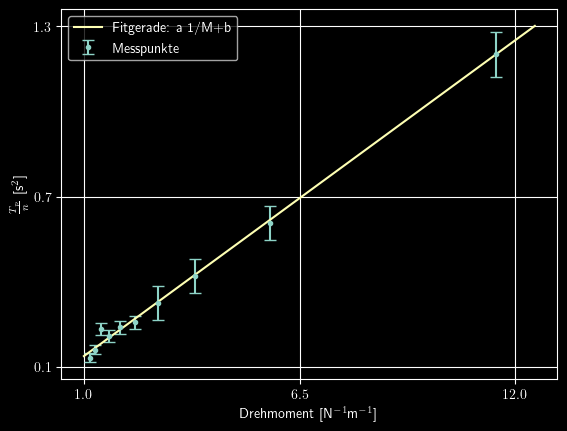

In [ ]:
fig=plt.figure()
m=np.linspace(1,12.5,500)
# print(1/m)


x=1/dm


plt.errorbar(x,T_n,yerr=Tnerr,capsize=4,fmt='.',label='Messpunkte')
plt.plot(m,f(m,a_1_sp,b_1_sp),label='Fitgerade: a 1/M+b')
#plt.plot(m,f(m,a_1_sm,b_1_sm),label='Fitgerade, gewichtet, mit statsmodels')
plt.xlabel('Drehmoment [N$^{-1}$m$^{-1}$]')
plt.ylabel(r' $\frac{T_{p}}{n}$ [s$^{2}$]')
plt.xticks(np.arange(1,12.5,step=5.5))
plt.yticks(np.arange(0.1,1.4,step=0.6))
plt.grid()
plt.legend()
# fig.savefig('A1.png',dpi=600)
plt.show()
# print(1/m_1)
# print((T_p_1[1:]))

In [ ]:
fig=plt.figure()
x2=np.linspace(2,15,100)

plt.errorbar(n_2,T_p_2,yerr=T_p_2_err,fmt='.',capsize=4,label='Messwerte')
plt.plot(x2,f(x2,a_2_sp,b_2_sp),label=f'Fitgerade: a n+b')
plt.xlabel('Kreisdrehzahl $n$ [s$^{-1}$]')
plt.ylabel('$T_{p}$ [s]')
plt.xticks(np.arange(2,15.1,step=6.5))
plt.yticks(np.arange(1.5,4.6,step=1.5))
plt.grid()
plt.legend()

fig.savefig('A2.png',dpi=600)

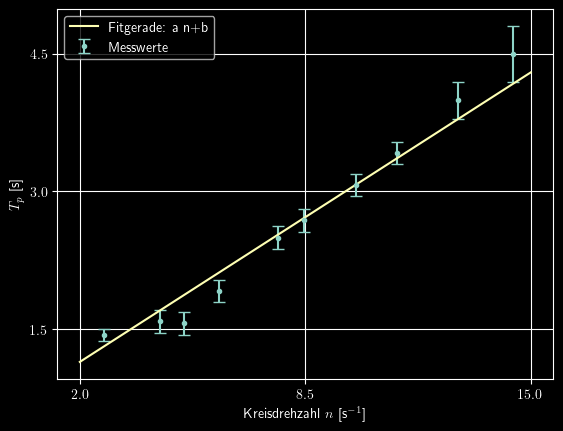

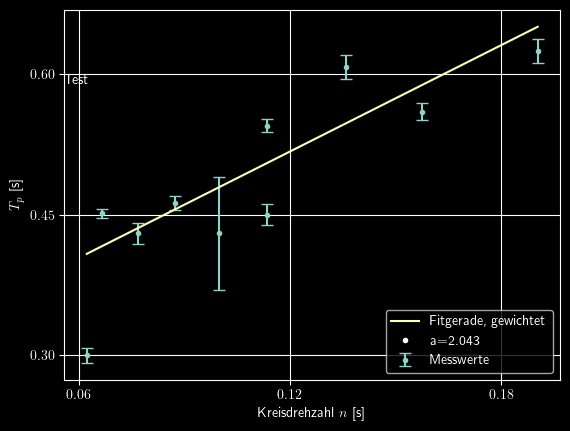

In [ ]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.errorbar(hh,diff_T,yerr=diff_t_err,fmt='.',capsize=4,label='Messwerte')
ax.plot(hh,f(hh,a_3_sp,b_3_sp),label='Fitgerade, gewichtet')
ax.plot([],[],'w.',label=f'a={a_3_sm}')
ax.set_xlabel('Kreisdrehzahl $n$ [s]')
ax.set_ylabel('$T_{p}$ [s]')
ax.set_xticks(np.arange(0.06,0.2,step=0.06))
ax.set_yticks(np.arange(0.3,0.66,step=0.15))
ax.grid()
ax.legend()
ax.text(0.0, 0.8, 'Test', transform=ax.transAxes)
plt.show()
#fig.savefig('A3.png',dpi=600)

In [ ]:
h3_1=1/n_3_1
pop,cov=curve_fit(f,h3_1,Tn_1)# ,sigma=dt_err
a_3_1,b_3_1=pop
da_3_1,db_3_1=np.sqrt(np.diagonal(cov))
#print(np.sqrt(cov[0][0]),np.sqrt(cov[1][1]))
print(f'Steigung: a={ufloat(a_3_1,da_3_1)}')
print(f'Achsenabschnitt: b={ufloat(b_3_1,db_3_1)}')

Steigung: a=2.3+/-0.8
Achsenabschnitt: b=0.22+/-0.09


In [ ]:
for i in range(len(dt_err)):
    dt_err[i]=np.sqrt(dt_err[i]**2+0.1**2)
print(dt_err)
for i in range(10):
    n_err[i]=0.2
n_err

[np.float64(0.10143470806385751), np.float64(0.10143470806385751), np.float64(0.10283968105745954), np.float64(0.10178899744078435), np.float64(0.10160708636704431), np.float64(0.10160708636704431), np.float64(0.10160708636704431), np.float64(0.1044030650891055), np.float64(0.10261091559868278), np.float64(0.1077032961426901)]


array([0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2])

2.323406699274327 0.7576874856811346 0.21739396591785276 0.0887744464222998


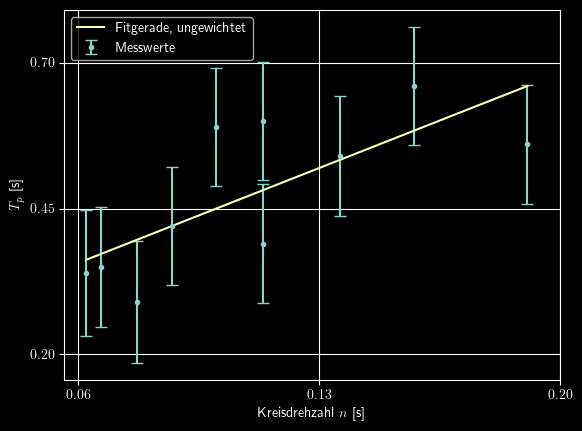

In [ ]:
fig=plt.figure()
h3_1=1/n_3_1
print(a_3_1,da_3_1,b_3_1,db_3_1)
plt.errorbar(h3_1,Tn_1,yerr=dt_err,fmt='.',capsize=4,label='Messwerte')
plt.plot(h3_1,f(h3_1,a_3_1,b_3_1),label='Fitgerade, ungewichtet')
plt.xlabel('Kreisdrehzahl $n$ [s]')
plt.ylabel('$T_{p}$ [s]')
plt.xticks(np.arange(0.06,0.21,step=0.07))
plt.yticks(np.arange(0.2,0.76,step=0.25))
plt.grid()
plt.legend()
# fig.savefig('A3_2.png',dpi=600)
plt.show()

# $\chi^2$ für alle Messreihen

In [ ]:
# reduziertes chi quadrat
chi_sq_M1=round(stats.chisquare(T_n)[0]/(len(T_p_2)-2),2)
chi_sq_M2=round(stats.chisquare(T_p_2)[0]/(len(T_p_2)-2),2)
chi_sq_M3=round(stats.chisquare(diff_T)[0]/(len(B)-2),2)
chi_sq_M4=round(stats.chisquare(Tn_1)[0]/(len(Tn_1)-2),2)
# print(f'Reduziertes Chi Quadrat der ersten Messreihe: \n{chi_sq_M1}\n\n')
# print(f'Reduziertes Chi Quadrat der zweiten Messreihe: \n{chi_sq_M2}\n\n')
chi_tab=pd.DataFrame({'Messreihe 1':[chi_sq_M1],'Messreihe 2':[chi_sq_M2],'Messreihe 3':[chi_sq_M3],'M4': chi_sq_M4},index=[r'$\chi^{2}$'])
chi_tab

,Messreihe 1,Messreihe 2,Messreihe 3,M4
$\chi^{2}$,0.31,0.49,0.02,0.04


In [ ]:
chsq_M1 = chi_sq(T_n, f(k, a_1_sp, b_1_sp), Tnerr)
chsq_M2 = chi_sq(T_p_2, f(n_2, a_2_sp, b_2_sp), T_p_2_err)
chsq_M3 = chi_sq(diff_T, f(hh, a_3_sp, b_3_sp), diff_t_err)
# chsq_M4 = chi_sq(Tn_1, f(h3_1, a_3_1, b_3_1), dt_err)
chi_tab1 = pd.DataFrame({
    'Messreihe 1':[chsq_M1],
    'Messreihe 2':[chsq_M2],
    'Messreihe 3':[chsq_M3],
    # 'M4': chsq_M4
    },index=[r'$\chi^{2}$'])
chi_tab1

,Messreihe 1,Messreihe 2,Messreihe 3
$\chi^{2}$,1.067318,2.048161,40.856943


In [ ]:
Zähler=(Tn_1-f(h3_1,a_3_1,b_3_1))**2
Nenner=np.sqrt(dt_err)
test=Zähler/Nenner
test=test.sum()
test

np.float64(0.21988778205286666)

In [ ]:
test/(len(dt_err)-2)

np.float64(0.027485972756608332)

# Berechnung von $J_x$

Formel:
$$ T_p=\frac{4 \pi^2 J_x n}{M} $$
$M $: Drehmoment  
$J_x$: Hauptträgheitsmoment  
$n$: Kreisdrehzahl

## Aufgabe 1

In [ ]:
def J_x_a1(a,n):
    J=a/(4*np.pi**2*n)
    return J
n_1_err=np.array([ufloat(10.81,0.05),
                 ufloat(10.7,0.05),
                 ufloat(10.7,0.05),
                 ufloat(10.7,0.05),
                 ufloat(10.75,0.05),
                 ufloat(10.8,0.05),
                 ufloat(10.8,0.05),
                 ufloat(10.8,0.05),
                 ufloat(10.8,0.05),
                 ufloat(10.8,0.05)])
N_1_err=n_1_err.mean()
print(N_1_err)
N_1=n_1.mean()

a_1_sp_err=ufloat(a_1_sp,da_1_sp)

10.766+/-0.016


In [ ]:
def J(a):
    J=a/(4*np.pi**2)
    return J

a=J(a_1_sp)
a_err=J(a_1_sp_err)

print(a)
print(a_err)

0.002563318544780838
0.00256+/-0.00017


In [ ]:
# mit sp
# Ohne Fehler:
J_x_A1=J(a_1_sp)  #


# mit Fehler
J_x_A1_err=J(a_1_sp_err)

print(J_x_A1)
print(J_x_A1_err)

0.002563318544780838
0.00256+/-0.00017


In [ ]:
# mit sm
# Ohne Fehler:
J_x_A1=J(a_1_sp)

a_1_sp_err=ufloat(a_1_sp,da_1_sp)
# mit Fehler
J_x_A1_err=J(a_1_sp_err)

print(J_x_A1)
print(J_x_A1_err)

0.002563318544780838
0.00256+/-0.00017


## Aufgabe 2

In [ ]:
def Jx_A2(a,r,m,g):
    J=a*r*m*g/(4*np.pi**2)
    return J

In [ ]:
# mit Scipy
J_x_A2=Jx_A2(a_2_sp,r_h,0.2,g)
print(J_x_A2)
J_x_A2_err=Jx_A2(ufloat(a_2_sp,da_2_sp),r_h_err,0.2,g_err)
print(J_x_A2_err)

0.002136430382849808
0.00214+/-0.00014


In [ ]:
# Mit sm
J_x_A2_sm=Jx_A2(a_2_sm,r_h,0.2,g)
print(J_x_A2_sm)
J_x_A2_sm_err=Jx_A2(ufloat(a_2_sm,da_2_sm),r_h_err,0.2,g_err)
print(J_x_A2_sm_err)

0.0024220394318805252
0.00242+/-0.00011


# gewichtetes Mittel von $J_x$

In [ ]:
Mitteln=np.array([J_x_A1 ,J_x_A2])
weights=np.array([15e-5,13e-5])
mittel_gew=np.average(Mitteln,weights=weights)
print(mittel_gew)
mit_gew_err=ufloat(mittel_gew,10e-5)
print(mit_gew_err)

0.002365120469598574
0.00237+/-0.00010


In [ ]:
J_x_tab=pd.DataFrame({'Ohne Fehler': [J_x_A1,J_x_A2,mittel_gew],'Mit Fehler': [J_x_A1_err,J_x_A2_err,mit_gew_err]},
                     index=['Aufgabe 1: Jx','Aufgabe 2: Jx','gew. gemittelt: Jx'])
J_x_tab

,Ohne Fehler,Mit Fehler
Aufgabe 1: Jx,0.002563,0.00256+/-0.00017
Aufgabe 2: Jx,0.002136,0.00214+/-0.00014
gew. gemittelt: Jx,0.002365,0.00237+/-0.00010


In [ ]:
# Neuer Versuch
mean=np.array([a ,J_x_A2])
weights=np.array([15e-5,13e-5])
mean_gew=np.average(mean,weights=weights)
print(mean_gew)
mean_gew_err=ufloat(mean_gew,10e-5)
print(mean_gew_err)
ujx_Durch=((1/(0.00017**-2+0.00014**-2))**0.5 )
print(ujx_Durch)

0.002365120469598574
0.00237+/-0.00010
0.00010807023298638695


# Berechnung von $J_s$

## Aufgabe 3

$$ T_n=\frac{J_s}{J_x}\frac{1}{n}\\ \Rightarrow J_s= a_3 \cdot J_x$$

In [ ]:
J_s=a_3_sp*mittel_gew
print(J_s)
J_s_err=ufloat(a_3_sp,da_3_sp)*mit_gew_err
print(J_s_err)
#print(J_s_err*1000)

0.004472226757306997
0.0045+/-0.0012


In [ ]:
J_s_m=a_3_sm*mean_gew
print(J_s_m)
J_s_m_err=ufloat(a_3_sm,da_3_sm)*mean_gew_err
print(J_s_m_err)

0.004831941119389887
0.0048+/-0.0010


In [ ]:
a_3_sm

2.043

In [ ]:
a_3_sp

np.float64(1.8909086512899937)

# Berechnung von $J_x$

## Aufgabe 4

$$ J_x=\frac{1}{2} \rho \pi h (r_2^4-r_1^4) $$

In [ ]:
def J_x(rho,h,r1,r2):
    J=0.5*rho*np.pi*h*(r2**4-r1**4)
    return J

In [ ]:
# Scheibe als Hohlzylinder
H1=np.array([0,ufloat(12,0.05)/2,ufloat(20.3,0.05)+ufloat(31.8,0.05)+ufloat(182.1,0.05),0])/1000     # in Metern
H2=np.array([ufloat(12,0.05)/2,ufloat(24.5,0.05)/2,ufloat(20.3,0.05),0])/1000
H3=np.array([ufloat(24.5,0.05)/2,ufloat(42.5,0.05)/2,ufloat(20.3,0.05)-ufloat(7,0.05),0])/1000
H4=np.array([ufloat(42.5,0.05)/2,ufloat(91.2,0.05)/2,ufloat(13.3,0.05)-ufloat(7,0.05),0])/1000
H5=np.array([ufloat(91.2,0.05)/2,ufloat(119.1,0.05)/2,ufloat(20.3,0.05),0])/1000
T1=np.array([ufloat(12,0.05)/2,ufloat(42,0.05)/2,ufloat(30.2,0.05),0])/1000
S1=np.array([0,ufloat(15,0.05)/2,ufloat(189.6,0.05)-ufloat(182.1,0.05),0])/1000

hohlzylinder=pd.DataFrame({'H1':H1,
                          'H2':H2,
                          'H3':H3,
                          'H4':H4,
                          'H5':H5,
                          'Tariergewicht':T1,
                          'Schraube':S1},
                          index=['Innenradius',
                                'Außenradius',
                                'Höhe',r'$J_s$'])
hohlzylinder

,H1,H2,H3,H4,H5,Tariergewicht,Schraube
Innenradius,0.0,0.006000+/-0.000025,0.012250+/-0.000025,0.021250+/-0.000025,0.045600+/-0.000025,0.006000+/-0.000025,0.0
Außenradius,0.006000+/-0.000025,0.012250+/-0.000025,0.021250+/-0.000025,0.045600+/-0.000025,0.059550+/-0.000025,0.021000+/-0.000025,0.007500+/-0.000025
Höhe,0.23420+/-0.00009,0.02030+/-0.00005,0.01330+/-0.00007,0.00630+/-0.00007,0.02030+/-0.00005,0.03020+/-0.00005,0.00750+/-0.00007
$J_s$,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Sara
Hh1=np.array([0,ufloat(12,0.05)/2,ufloat(19.7,0.05)+ufloat(31.8,0.05)+ufloat(181.5,0.05),0])/1000     # in Metern
Hh2=np.array([ufloat(12,0.05)/2,ufloat(24.7,0.05)/2,ufloat(20.3,0.05),0])/1000
Hh3=np.array([ufloat(24.7,0.05)/2,ufloat(42.5,0.05)/2,ufloat(19.7,0.05)-ufloat(7,0.05),0])/1000
Hh4=np.array([ufloat(42.5,0.05)/2,ufloat(69.7,0.05)/2,ufloat(12.7,0.05)-ufloat(7,0.05),0])/1000
Hh5=np.array([ufloat(69.7,0.05)/2,ufloat(119.1,0.05)/2,ufloat(19.7,0.05),0])/1000
Tt1=np.array([ufloat(12,0.05)/2,ufloat(41.9,0.05)/2,ufloat(30.2,0.05),0])/1000
Ss1=np.array([0,ufloat(15,0.05)/2,ufloat(189,0.05)-ufloat(181.5,0.05),0])/1000

sara=pd.DataFrame({'H1':Hh1,
                          'H2':Hh2,
                          'H3':Hh3,
                          'H4':Hh4,
                          'H5':Hh5,
                          'Tariergewicht':Tt1,
                          'Schraube':Ss1},
                          index=['Innenradius',
                                'Außenradius',
                                'Höhe',r'$J_s$'])
sara


,H1,H2,H3,H4,H5,Tariergewicht,Schraube
Innenradius,0.0,0.006000+/-0.000025,0.012350+/-0.000025,0.021250+/-0.000025,0.034850+/-0.000025,0.006000+/-0.000025,0.0
Außenradius,0.006000+/-0.000025,0.012350+/-0.000025,0.021250+/-0.000025,0.034850+/-0.000025,0.059550+/-0.000025,0.020950+/-0.000025,0.007500+/-0.000025
Höhe,0.23300+/-0.00009,0.02030+/-0.00005,0.01270+/-0.00007,0.00570+/-0.00007,0.01970+/-0.00005,0.03020+/-0.00005,0.00750+/-0.00007
$J_s$,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Dichten von Messing (M) und Eisen (Fe)
rho_M=8.4e3      # kg m^-3
rho_Fe=7.9e3        # kg m^-3

In [ ]:
H1[3]=J_x(rho_Fe,H1[2],H1[0],H1[1])
#H1[3]=J_x(rho_M,H1[2],H1[0],H1[1])
H2[3]=J_x(rho_M,H2[2],H2[0],H2[1])
H3[3]=J_x(rho_M,H3[2],H3[0],H3[1])
H4[3]=J_x(rho_M,H4[2],H4[0],H4[1])
H5[3]=J_x(rho_M,H5[2],H5[0],H5[1])
T1[3]=J_x(rho_M,T1[2],T1[0],T1[1])
S1[3]=J_x(rho_M,S1[2],S1[0],S1[1])

J_x_ges=H1[3]+H2[3]+H3[3]+H4[3]+H5[3]+S1[3]+T1[3]
print(J_x_ges)
J_x=np.array([0,0,0,J_x_ges])
print(J_x)

0.002671+/-0.000009
[0 0 0 0.0026713101288518837+/-9.148888946917387e-06]


In [79]:
# # Sara
# # Hh1[3]=J_x(rho_Fe,Hh1[2],Hh1[0],Hh1[1])
# #H1[3]=J_x(rho_M,H1[2],H1[0],H1[1])
# Hh2[3]=J_x(rho_M,Hh2[2],Hh2[0],Hh2[1])
# Hh3[3]=J_x(rho_M,Hh3[2],Hh3[0],Hh3[1])
# Hh4[3]=J_x(rho_M,Hh4[2],Hh4[0],Hh4[1])
# Hh5[3]=J_x(rho_M,Hh5[2],Hh5[0],Hh5[1])
# Tt1[3]=J_x(rho_M,Tt1[2],Tt1[0],Tt1[1])
# Ss1[3]=J_x(rho_M,Ss1[2],Ss1[0],Ss1[1])

# J_x_sara_ges=Hh1[3]+Hh2[3]+Hh3[3]+Hh4[3]+Hh5[3]+Ss1[3]+Tt1[3]
# print(J_x_sara_ges)
# J_x_sara=np.array([0,0,0,J_x_sara_ges])
# print(J_x_sara)

In [81]:
hohlzylinder=pd.DataFrame({'H1':H1,
                          'H2':H2,
                          'H3':H3,
                          'H4':H4,
                          'H5':H5,
                          'Tariergewicht':T1,
                          'Schraube':S1},
                          index=['Innenradius',
                                'Außenradius',
                                'Höhe',r'$J_x$'])
hohlzylinder

,H1,H2,H3,H4,H5,Tariergewicht,Schraube
Innenradius,0.0,0.006000+/-0.000025,0.012250+/-0.000025,0.021250+/-0.000025,0.045600+/-0.000025,0.006000+/-0.000025,0.0
Außenradius,0.006000+/-0.000025,0.012250+/-0.000025,0.021250+/-0.000025,0.045600+/-0.000025,0.059550+/-0.000025,0.021000+/-0.000025,0.007500+/-0.000025
Höhe,0.23420+/-0.00009,0.02030+/-0.00005,0.01330+/-0.00007,0.00630+/-0.00007,0.02030+/-0.00005,0.03020+/-0.00005,0.00750+/-0.00007
$J_x$,(3.77+/-0.06)e-06,(5.68+/-0.05)e-06,(3.183+/-0.024)e-05,0.000342+/-0.000004,0.002210+/-0.000008,(7.70+/-0.04)e-05,(3.13+/-0.05)e-07


In [82]:
sara=pd.DataFrame({'H1':Hh1,
                          'H2':Hh2,
                          'H3':Hh3,
                          'H4':Hh4,
                          'H5':Hh5,
                          'Tariergewicht':Tt1,
                          'Schraube':Ss1},
                          index=['Innenradius',
                                'Außenradius',
                                'Höhe',r'$J_s$'])
sara

,H1,H2,H3,H4,H5,Tariergewicht,Schraube
Innenradius,0.0,0.006000+/-0.000025,0.012350+/-0.000025,0.021250+/-0.000025,0.034850+/-0.000025,0.006000+/-0.000025,0.0
Außenradius,0.006000+/-0.000025,0.012350+/-0.000025,0.021250+/-0.000025,0.034850+/-0.000025,0.059550+/-0.000025,0.020950+/-0.000025,0.007500+/-0.000025
Höhe,0.23300+/-0.00009,0.02030+/-0.00005,0.01270+/-0.00007,0.00570+/-0.00007,0.01970+/-0.00005,0.03020+/-0.00005,0.00750+/-0.00007
$J_s$,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Vergleich von $J_s$ aus Aufgabe 3 mit dem Sollwert von Platz 4

In [83]:
# Trägheitsmomente der einzelnen Aufgaben
A_1_2=np.array([0,mit_gew_err])
A3=np.array([J_s_err,0])
A4=np.array([0,J_x_ges])
#A5=np.array([0,0])

In [84]:
Trägheistmoment=pd.DataFrame({'A1 und A2':A_1_2,
                              'A3':A3,
                              'A4':A4},
                            index=[r'$J_s$',r'$J_x$'])
Trägheistmoment

,A1 und A2,A3,A4
$J_s$,0,0.0045+/-0.0012,0
$J_x$,0.00237+/-0.00010,0,0.002671+/-0.000009


Die Werte aus der obigen Tabelle sollten in etwa folgende Größenordnung haben:
$$J_x \approx 0.0024\\J_s\approx 0.010$$

# Aufgabe 5